$\def\tcoreleft{\underset{\tiny\mid}{\textcolor{MidnightBlue}{⦸}}}$
$\def\tcorecenter{\underset{\tiny\mid}{\textcolor{RedOrange}{⦿}}}$
$\def\tcoreright{\underset{\tiny\mid}{\textcolor{MidnightBlue}{\oslash}}}$
<h1 style="text-align: center;"><b>TMQS Workshop 2024</b> @ Zuse Institute Berlin</h1>
<h2 style="text-align: center;">Summer School on Tensor Methods for Quantum Simulation</h2>
<h2 style="text-align: center;">June 3 - 5, 2024</h2>
<h1 style="text-align: center; background-color:#D6EAF8 ;padding:50px">$\tcoreleft - \tcoreleft - \tcoreleft - \cdots - \tcorecenter - \cdots - \tcoreright - \tcoreright$</h1>
</br>

***

## **Session 5 - Quantum Computing**

***

In [1]:
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

***

## Exercise 4.1

The qubit polar form is given by $|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + e^{i \varphi} \sin{\frac{\theta}{2}} |1\rangle$. 

The first two quantum logic gates, we consider in this exercise are the Hadamard gate $H$ and the phase shift gate $T$:

$\displaystyle H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix} \qquad $ and $ \qquad \displaystyle T = \begin{bmatrix}1 & 0 \\ 0 & e^{i \frac{\pi}{4}}\end{bmatrix}$

When applied to a basis state $|0\rangle$ or $|1\rangle$, the Hadamard gate transforms the state as follows:

$\displaystyle H | 0 \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle\right) \qquad$ and $\qquad \displaystyle H | 1 \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle\right)$

The $T$ gate applies a phase factor to the state $|1\rangle$, while leaving the state $|0\rangle$ unchanged:

$\displaystyle T | 0 \rangle = | 0 \rangle \qquad$ and $\qquad \displaystyle T | 1 \rangle = e^{i \frac{\pi}{4}} | 1 \rangle$

**a)** Create a quantum circuit consisting of one qubit by 

> qc = QuantumCircuit(1) 

and apply Hadamard gate and a T gate:

> qc.h(0), qc.t(0)

Draw the quantum circuit using 

> qc.draw(output='mpl') 

and plot the Bloch vector of the quantum state at each stage using

> plot_bloch_multivector(Statevector(qc))

Write down the polar form of the quantum state at each step of the circuit.

In [2]:
qc = QuantumCircuit(1)
state1 = Statevector(qc)
qc.h(0)
state2 = Statevector(qc)
qc.t(0)
state3 = Statevector(qc)
qc.draw() 

┌───┐┌───┐
q: ┤ H ├┤ T ├
   └───┘└───┘

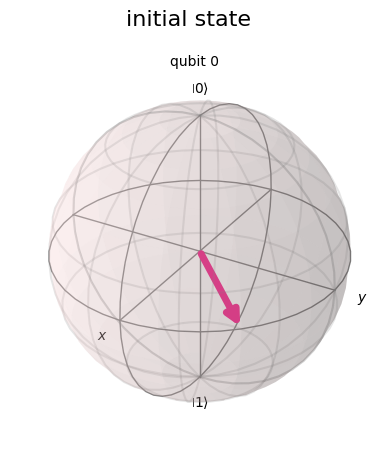

In [3]:
plot_bloch_multivector(state3,title='initial state')

$|\psi_1\rangle = | 0 \rangle$, 
$\qquad |\psi_2\rangle = \frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle$,
$\qquad |\psi_3\rangle = \frac{1}{\sqrt{2}}| 0 \rangle + \frac{e^{i \varphi}}{\sqrt{2}}| 1 \rangle$ with $\varphi = \frac{\pi}{4}$


**b)** Now, we want to measure our qubit using

> qc.measure_all()

To do this, we choose a simulator backend, which is responsible for simulating the execution of the circuit. The simulator plays a crucial role in simulating the behavior of a quantum circuit. It allows you to run quantum circuits on a classical computer and obtain the expected outcomes of the circuit without requiring a physical quantum device. 

Here, we choose the qasm_simulator, which simulates the execution of the circuit using a classical computer and provides the measurement statistics:

> simulator = Aer.get_backend('qasm_simulator')

We then execute the circuit on the simulator by passing the circuit and the chosen backend to the execute function.
We also specify the number of shots to simulate, which determines the number of times the circuit is executed to obtain statistical results.

> job = execute(qc, simulator, shots=10000)

Finally, we get the results of the simulation using the result method, and extract the measurement statistics using the get_counts method:

> result = job.result()

> counts = result.get_counts(qc)

The measurement statistics represent the probabilities of observing each possible measurement outcome, and are obtained by running the circuit multiple times and counting the number of times each outcome is observed.
The histogram of the counts data can be plotted by using

> plot_histogram(counts)

What happens if we measure the quantum state after the H gate, what if we measure after the T gate. Explain!

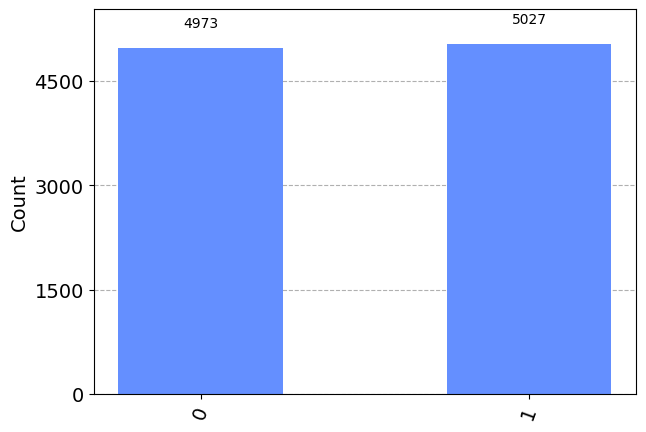

In [4]:
# Create circuit
qc = QuantumCircuit(1)
qc.h(0)
#qc.t(0)

# Measure the quantum state
qc.measure_all()

# Choose a simulator backend
backend = AerSimulator()

# Simulate the circuit
result = backend.run(transpile(qc, backend), shots=10000).result()

# get results
counts  = result.get_counts(qc)
plot_histogram(counts)


**c)** How can we measure the relative phase $\varphi$?

*Hint:* We need just one additional gate.

If we apply another Hadamard gate, we obtain the state $|\psi_4\rangle = \frac{1}{2} \left( (1 + e^{i \varphi}) |0\rangle + (1 - e^{i \varphi}) |0\rangle \right)$.

The probabilities of measuring 0 and 1 are given by

$\displaystyle \text{Pr}(0) = \left|\frac{1 + e^{i \varphi}}{2}\right|^2 = \frac{(1+e^{-i \varphi})(1+e^{i \varphi})}{4} = \frac{2+e^{i \varphi} + e^{-i \varphi}}{4} = \frac{2+ 2\text{Re} (e^{i \varphi})}{4} = \frac{1+ \cos (\varphi)}{2}$

and

$\displaystyle \text{Pr}(1) = \frac{1 - \cos (\varphi)}{2}$.

Let's measure the qubit:

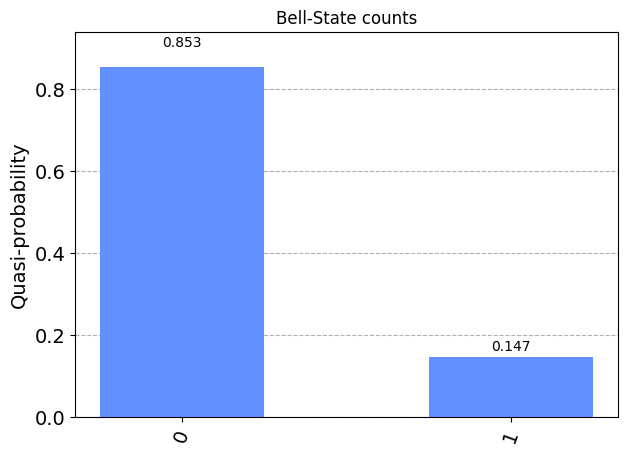

In [7]:
# Create circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)

# Measure the quantum state
qc.measure_all()

# Choose a simulator backend
backend = AerSimulator()

# Simulate the circuit
result = backend.run(transpile(qc, backend), shots=1000000).result()

# get results
counts  = result.get_counts(qc)
plot_distribution(counts, title='Bell-State counts')

We get $\varphi = \cos^{-1} \left( 2 \cdot \text{Pr}(0) -1 \right) \approx 0.784 \approx \frac{\pi}{4}$.

**d)** *extra task:* Show that any state $|\psi\rangle = \alpha |0\rangle + \beta |1 \rangle$ with $|\alpha|^2 + |\beta|^2 = 1$ can be written in the polar form (up to a global phase).

The coefficients $\alpha$ and $\beta$ can be expressed as $\alpha = r_1 e^{i \gamma_1}$ and $\beta = r_2 e^{i \gamma_2}$, respectively, with $r_1, r_2 \in \mathbb{R}$ and $\gamma_1, \gamma_2 \in [0, 2\pi)$. 

Thus, we have $|\psi \rangle = e^{i \gamma_1} \left( r_1 |0\rangle + r_2 e^{i(\gamma_2 - \gamma_1)} |1\rangle\right)$, where $e^{i \gamma_1}$ is a global phase and we define $\varphi = \gamma_2 - \gamma_1$. 

Since $r_1^2 + r_2^2 = 1$ and $0\leq r_1, r_2 \leq 1$, we find $\theta \in [0, \pi]$ such that $r_1 = \cos \frac{\theta}{2}$ and $r_2 = \sin \frac{\theta}{2}$. 

***

### Exercise 2

Now, we want to construct some specific states. The quantum logic gates which come now into play are the Pauli-$Z$ gate, the Pauli-$X$ (NOT) gate, and the CNOT gate:

$\displaystyle Z = \begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix}$, $\qquad \displaystyle \text{NOT} = \begin{bmatrix} 0& 1\\ 1 & 0 \end{bmatrix}$, $\qquad \displaystyle \text{CNOT} = \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0& 1\\ 0 & 0 & 1 & 0 \end{bmatrix}$

The $Z$ gate flips the phase of the basis state $|1\rangle$ while the NOT gate (sometimes called bit-flip) maps 
$|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$.

The CNOT (controlled NOT) gate acts on 2 qubits and performs the NOT operation on the second qubit only when the first qubit is $|1\rangle$.

<br/>

**a)** Construct the Bell state $\displaystyle |\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} $. To do so, create a quantum circuit with two qubits and and use one Hadamard gate and one CNOT gate. Draw the circuit, measure the final state, and plot the histogram

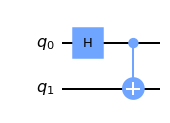

In [11]:
# Create circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl') 

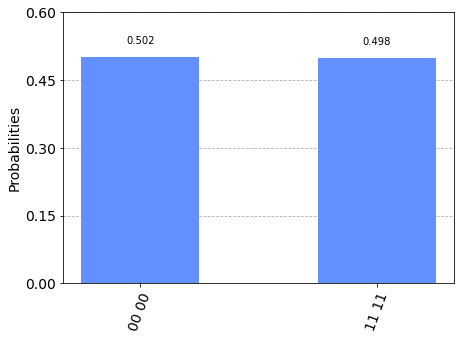

In [13]:
# Measure the quantum state
qc.measure_all()

# simulator
simulator = Aer.get_backend('aer_simulator')

# Execute the circuit on the simulator
job = execute(qc, simulator, shots=10000)

# Get the results
result = job.result()

# Run and get counts
result = simulator.run(qc, shots=100000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

**b)** How can we construct the other Bell states?

$\displaystyle|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}} $, $\qquad \displaystyle|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}} $, $\qquad \displaystyle|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}} $

For $|\Phi^-\rangle$, we have to apply the Z gate to the second qubit.

For $|\Psi^+\rangle$, we have to apply the NOT gate to the second qubit.

For $|\Psi^-\rangle$, we have to apply the Z gate and the NOT gate to the second qubit.

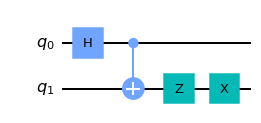

In [14]:
# Create circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(1)
qc.x(1)
qc.draw(output='mpl') 

**c)** In quantum computing, oracles play a crucial role in many quantum algorithms. An oracle is a black box subroutine used to perform a specific computation on a quantum state. Find an oracle $U$, i.e., a unitary operation, acting on three qubits corresponding to the following truth table:

|    | Input | Output |
| -- | ----- | ------ |
| 0  | 000   | 000    |
| 1  | 001   | 001    |
| 2  | 010   | 011    |
| 3  | 011   | 010    |
| 4  | 100   | 111    |
| 5  | 101   | 110    |
| 6  | 110   | 100    |
| 7  | 111   | 101    |


Write down the matrix representation! What does the circuit look like?

The matrix representation is 
$U = \begin{bmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\end{bmatrix}$

Looking at the second half of the truth table, we can see that the the second qubit is always flipped if the first qubit is $|1\rangle$. And if the result is then the state $|1\rangle$ on the second qubit, we also flip the last qubit. This can be done by the following circuit:

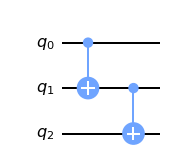

In [15]:
# Create circuit
qc = QuantumCircuit(3)
qc.cx(0,1)
qc.cx(1,2)
qc.draw(output='mpl') 

This actually implements the above oracle since the last qubit is also flipped if the first qubit is $|0\rangle$ and the second qubit is $|1\rangle$.

In tensor notation this would look like

$\displaystyle U = (\text{CNOT} \otimes id) \cdot (id \otimes \text{CNOT}) = 
\begin{bmatrix}
1 & 0 & 0 & 0 &  &  &  &  \\
0 & 1 & 0 & 0 &  &  &  &  \\
0 & 0 & 0 & 1 &  &  &  &  \\
0 & 0 & 1 & 0 &  &  &  &  \\
 &  &  &  & 1 & 0 & 0 & 0 \\
 &  &  &  & 0 & 1 & 0 & 0 \\
 &  &  &  & 0 & 0 & 0 & 1 \\
 &  &  &  & 0 & 0 & 1 & 0 \\
\end{bmatrix} \cdot
\begin{bmatrix}
1 & 0 &  &  &  &  &  &  \\
0 & 1 &  &  &  &  &  &  \\
 &  & 1 & 0 &  &  &  &  \\
 &  & 0 & 1 &  &  &  &  \\
 &  &  &  &  &  & 1 & 0 \\
 &  &  &  &  &  & 0 & 1 \\
 &  &  &  & 1 & 0 &  &  \\
 &  &  &  & 0 & 1 & &  \\
\end{bmatrix}$

where $id \in \mathbb{R}^{2 \times 2}$.

**d)** *extra task:* What kind of gate is expressed by the following circuit? Here, 'tdg' denotes the adjoint of the T gate.

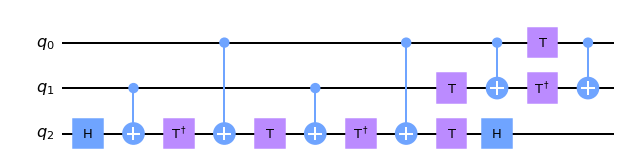

In [16]:
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.barrier()
circuit.t(1)
circuit.t(2)
circuit.barrier()
circuit.h(2)
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
circuit.draw(plot_barriers = False, output='mpl') 

*Hint:* For states of the form $|11x\rangle$, we have $|110\rangle \mapsto |111\rangle$ and $|111\rangle \mapsto |110\rangle$. What happens with quantum states of different form?

For states of the form $|01x\rangle$, we can ignore all controlled gates with control on the first qubit. Furthermore, $T^\dagger$ and $T$ cancel each other out. Thus, we get the following reduced circuit:

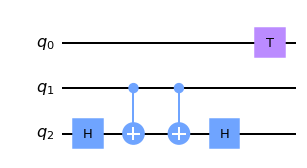

In [17]:
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(1,2)
circuit.cx(1,2)
circuit.barrier()
circuit.barrier()
circuit.h(2)
circuit.barrier()
circuit.t(0)
circuit.draw(plot_barriers = False, output='mpl') 

Now, the CNOT as well as the Hadamard gates cancel each other out and only one $T$ gate remains. As our first qubit is in state 0, this can also be neglected and we have $|01x\rangle \mapsto |01x\rangle$. For states of the form $|00x\rangle$, the same arguments can be used.

Now consider states of the form $|10x\rangle$. In this case, we can ignore all controlled NOT gates with control qubit 2. Here, the $T$ and $T^\dagger$ gates cancel each other out and, therefore, also the first two CNOT gates with control qubit 1. Finally, we get

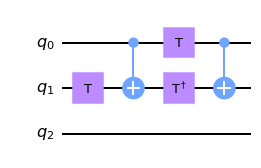

In [18]:
circuit = QuantumCircuit(3)
circuit.barrier()
circuit.t(1)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
circuit.draw(plot_barriers = False, output='mpl') 

If we apply this to a state $|10x\rangle$, the first $T$ gate has no effect. By applying the CNOT gate, we get $|11x\rangle$. If we now apply the $T$ and $T^\dagger$ gate to the first and second qubit, respectively, the phases cancel each other out. Finally, we obtain $|10x\rangle$ again when we apply the last CNOT gate. Overall: $|10x\rangle \mapsto |10x\rangle$.

That is, the above circuit is an expression for the CCNOT (aka Toffoli) gate given by,

$\displaystyle \text{CCNOT} = \begin{bmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 
\end{bmatrix}$

which performs a conditional NOT operation on the third qubit if and only if both control qubits (here, the first and second qubit) are in the state $|1\rangle$.

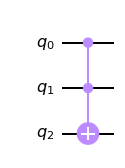

In [19]:
circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.draw(plot_barriers = False, output='mpl') 